# Project 4 - Predict West Nile Virus

## 5. Cost Benefit Analysis

In [1]:
# Importing libraries

import numpy as np
import pandas as pd
import scipy as sp
import seaborn as sns
import matplotlib.pyplot as plt

from matplotlib.pyplot import get_cmap
from sklearn.neighbors import KernelDensity

%matplotlib inline

In [2]:
# Read in datasets
train = pd.read_csv('../assets/train_engineered.csv')
test = pd.read_csv('../assets/test_engineered.csv')
spray = pd.read_csv('../assets/spray_cleaned.csv')
sub = pd.read_csv('../assets/submission_kaggle.csv')

## Findings

From the model, these are the features that have highest influence on whether a mosquito cluster is WNV positive.

![top_features](../images/top_25_features.png)

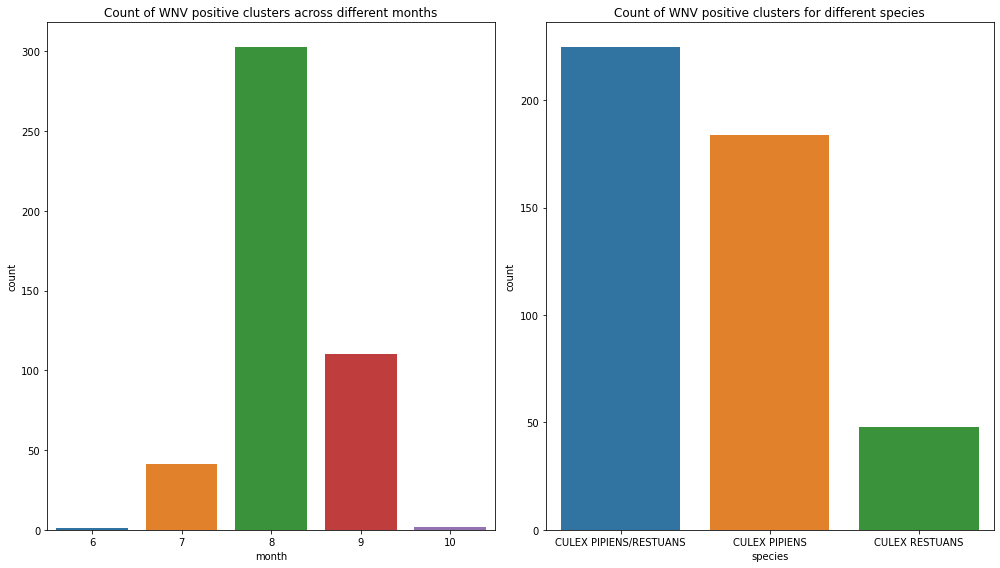

In [3]:
fig, ax = plt.subplots(1,2,figsize = [14,8]);

sns.countplot(x = 'month', data = train[train['wnvpresent']==1], ax = ax[0]);
sns.countplot(x = 'species', data = train[train['wnvpresent']==1], ax = ax[1]);

ax[0].set_title('Count of WNV positive clusters across different months');
ax[1].set_title('Count of WNV positive clusters for different species');

fig.tight_layout();

As the month_weights are given directly to each of the months. We look into the cases of WNV positive for the respective months and found that Aug is the month that is heavily hit by WNV virus. Followed by September and July. The city should probably step up spraying efforts during these months.

Species_weights are weights given to the species base on the number of WNV positive cases found. Looking at the graph, the city should target clusters that has these 3 species as they are the only 3 species that carry the virus.

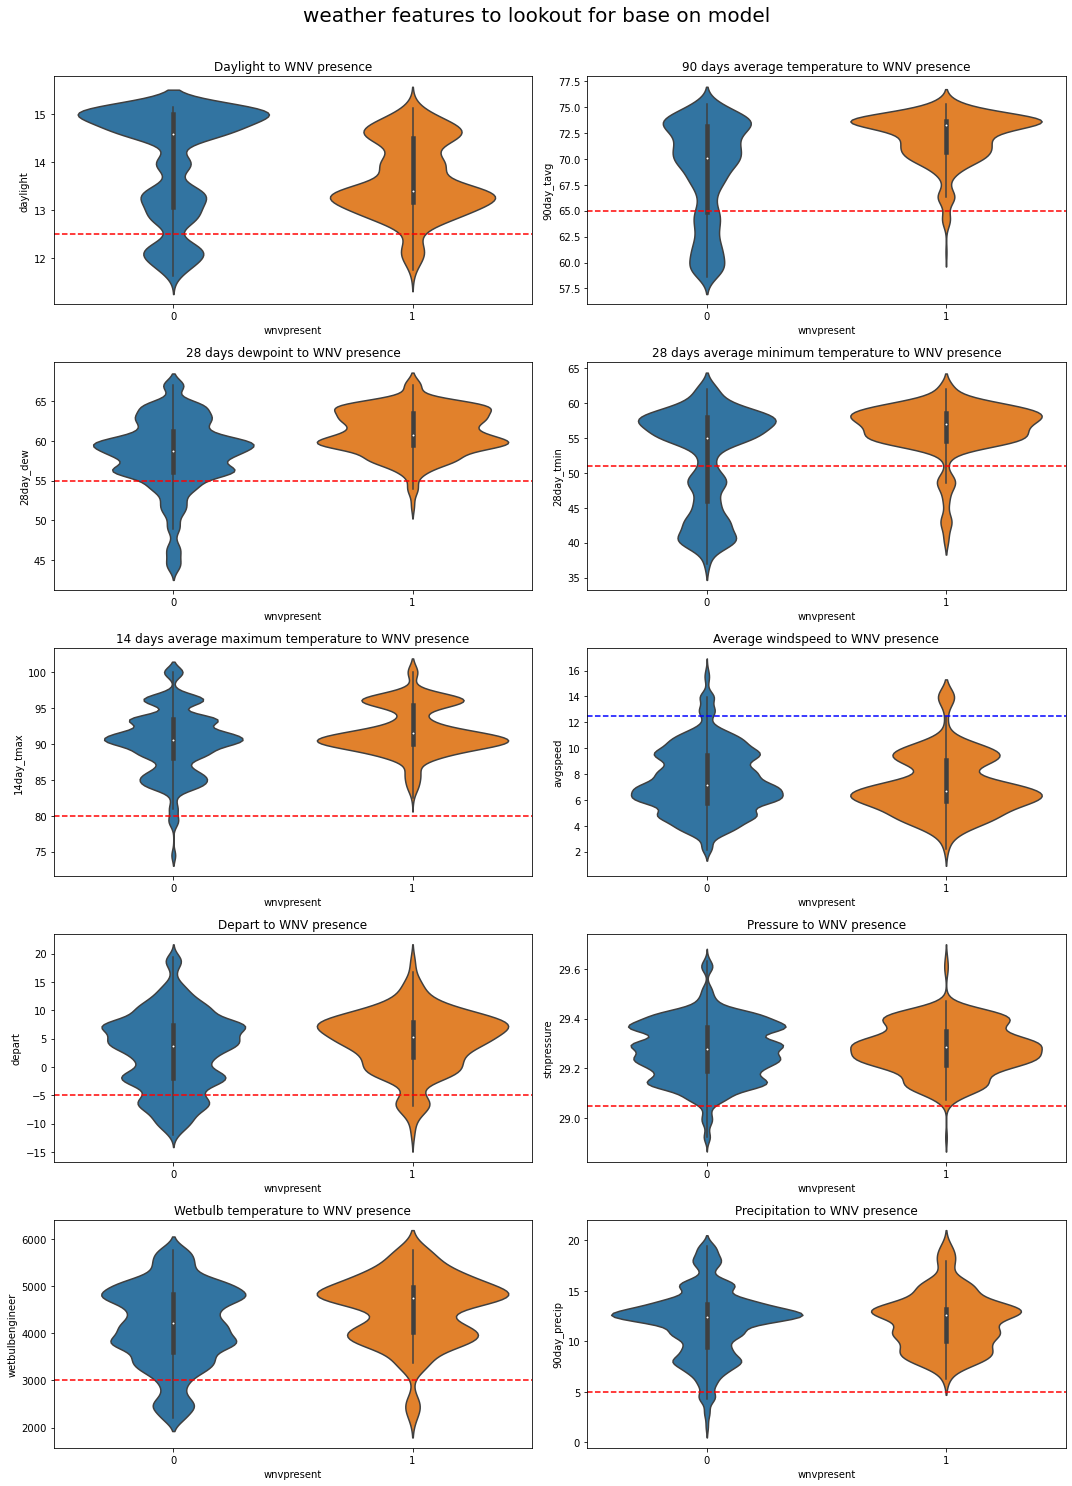

In [4]:
fig, ax = plt.subplots(5,2,figsize = [15,20]);
ax = ax.ravel();
sns.violinplot(y = 'daylight', x = 'wnvpresent', data = train, ax = ax[0]).axhline(12.5, ls='--', c='r');
sns.violinplot(y = '90day_tavg', x = 'wnvpresent', data = train, ax = ax[1]).axhline(65, ls='--', c='r');
sns.violinplot(y = '28day_dew', x = 'wnvpresent', data = train, ax = ax[2]).axhline(55, ls='--', c='r');
sns.violinplot(y = '28day_tmin', x = 'wnvpresent', data = train, ax = ax[3]).axhline(51, ls='--', c='r');
sns.violinplot(y = '14day_tmax', x = 'wnvpresent', data = train, ax = ax[4]).axhline(80, ls='--', c='r');
sns.violinplot(y = 'avgspeed', x = 'wnvpresent', data = train, ax = ax[5]).axhline(12.5, ls='--', c='b');
sns.violinplot(y = 'depart', x = 'wnvpresent', data = train, ax = ax[6]).axhline(-5, ls='--', c='r');
sns.violinplot(y = 'stnpressure', x = 'wnvpresent', data = train, ax = ax[7]).axhline(29.05, ls='--', c='r');
sns.violinplot(y = 'wetbulbengineer', x = 'wnvpresent', data = train, ax = ax[8]).axhline(3000, ls='--', c='r');
sns.violinplot(y = '90day_precip', x = 'wnvpresent', data = train, ax = ax[9]).axhline(5, ls='--', c='r');

ax[0].set_title('Daylight to WNV presence')
ax[1].set_title('90 days average temperature to WNV presence')
ax[2].set_title('28 days dewpoint to WNV presence')
ax[3].set_title('28 days average minimum temperature to WNV presence')
ax[4].set_title('14 days average maximum temperature to WNV presence')
ax[5].set_title('Average windspeed to WNV presence')
ax[6].set_title('Depart to WNV presence')
ax[7].set_title('Pressure to WNV presence')
ax[8].set_title('Wetbulb temperature to WNV presence')
ax[9].set_title('Precipitation to WNV presence')

fig.suptitle('weather features to lookout for base on model', y = 1.03, fontsize = 20);
fig.tight_layout();

Top weather features in predicting WNV presence. We can see the frequency/spread of the WNV presence over the range of these features in the violinplot. For graphs with the red line, there are trends of higher counts of WNV positive clusters as the feature increases in value. Conversely, for graphs with the blue line, there are trends of higher counts of WNV positive clusters as the feature decreases in value.

## Cost Benefit Analysis

The findings above help hightlight those features that are highly correlated to WNV presence and help the government to make decision on the spraying plan. 

Since we have already developed a model that predicts whether an area has the West Nile Virus in the test dataset, now we can have a look at the distribution of locations with Wile Nile Virus presence in Chicago by visualising our prediction result.

In [5]:
sub.head()

,Id,WnvPresent
0,1,0.028632
1,2,0.026925
2,3,0.028632
3,4,0.026925
4,5,0.026925


In [6]:
sub.shape

(116293, 2)

In [7]:
sub['Latitude']=test['latitude']
sub['Longitude']=test['longitude']
sub.head(10)

,Id,WnvPresent,Latitude,Longitude
0,1,0.028632,41.954690,-87.800991
1,2,0.026925,41.954690,-87.800991
2,3,0.028632,41.954690,-87.800991
3,4,0.026925,41.954690,-87.800991
4,5,0.026925,41.954690,-87.800991
5,6,0.026925,41.954690,-87.800991
6,8,0.026925,41.954690,-87.800991
7,9,0.031304,41.994991,-87.769279
8,10,0.029597,41.994991,-87.769279
9,11,0.031304,41.994991,-87.769279


In [8]:
sub.sort_values(by='WnvPresent', ascending = False).head(10)

,Id,WnvPresent,Latitude,Longitude
96359,109916,0.740679,41.974689,-87.890615
96366,109923,0.738892,41.974689,-87.890615
96370,109927,0.738892,41.974689,-87.890615
115504,109931,0.738892,41.974689,-87.890615
96369,109926,0.738892,41.974689,-87.890615
96364,109921,0.738892,41.974689,-87.890615
96368,109925,0.738892,41.974689,-87.890615
96365,109922,0.738892,41.974689,-87.890615
96367,109924,0.738892,41.974689,-87.890615
96352,109908,0.735258,41.992478,-87.862995


In [9]:
locations = sub[['Longitude', 'Latitude','WnvPresent']].drop_duplicates().values
locations

array([[-8.78009910e+01,  4.19546900e+01,  2.86323756e-02],
       [-8.78009910e+01,  4.19546900e+01,  2.69251870e-02],
       [-8.77692790e+01,  4.19949910e+01,  3.13038619e-02],
       ...,
       [-8.77167880e+01,  4.18992300e+01,  3.32514692e-01],
       [-8.76882670e+01,  4.19030020e+01,  2.93546654e-01],
       [-8.77763850e+01,  4.19421140e+01,  4.22029699e-01]])

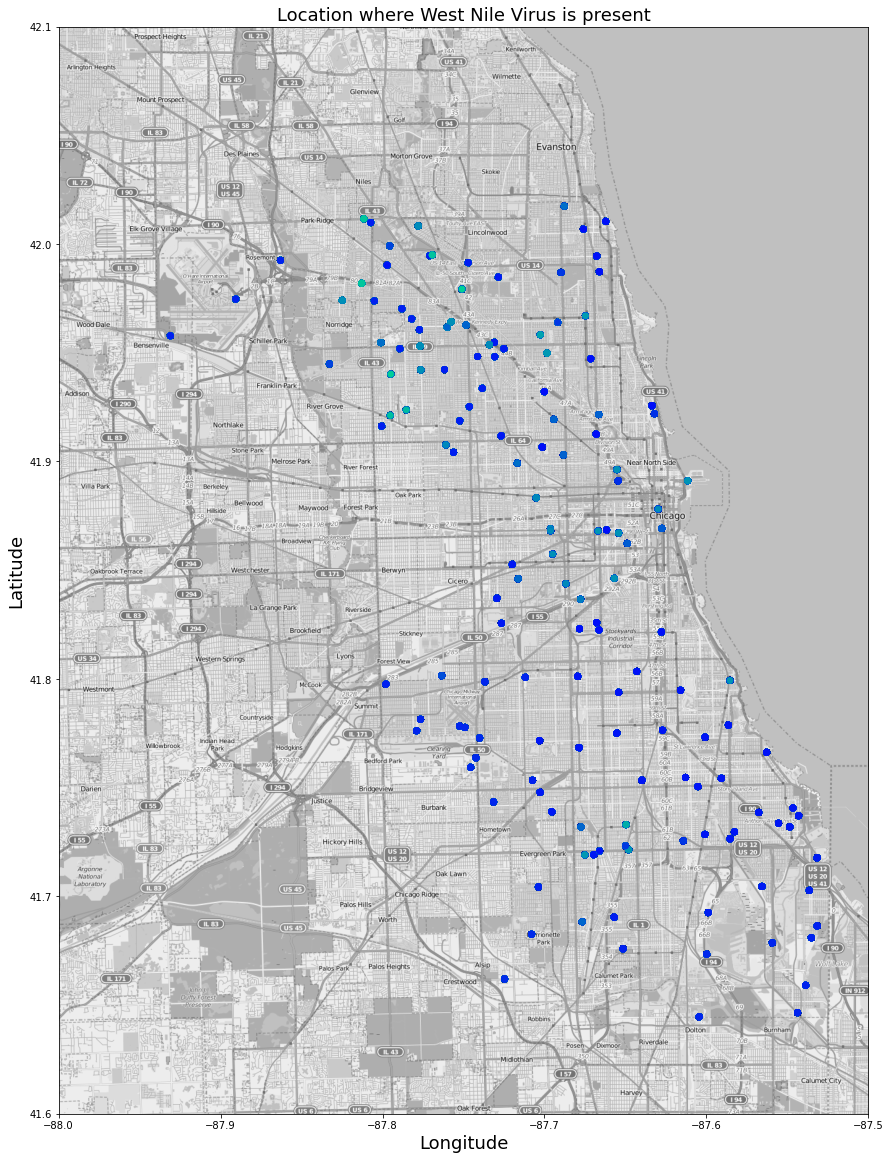

In [10]:
# Map data copyrighted OpenStreetMap contributors and 
# available from https://www.openstreetmap.org"
mapdata = np.loadtxt('../assets/mapdata_copyright_openstreetmap_contributors.txt')

aspect = mapdata.shape[0] * 1.0 / mapdata.shape[1]
lon_lat_box = (-88, -87.5, 41.6, 42.1)

plt.figure(figsize=(20,20))
plt.imshow(mapdata, 
           cmap=plt.get_cmap('gray'), 
           extent=lon_lat_box, 
           aspect=aspect)

plt.scatter(locations[:,0], locations[:,1], marker='o',
           c = locations[:,2], cmap = plt.get_cmap("winter"))

plt.title("Location where West Nile Virus is present", fontsize=18)
plt.xlabel("Longitude", fontsize=18)
plt.ylabel("Latitude", fontsize=18)

plt.savefig('../images/location_WNV_heatmap.png')

By plotting the location of where WNV is present, we can see the distrubution of WNV presence in Chicago is scattered. It is impossible to spray all over the city due to the limitation in resources.

To decide the scale, frequency, location of spraying, we have 2 questions to answer:

1. When to spray? 
2. Where to spray?

These 2 questions will also help us to carry out cost-benefit analysis.

### 1. When to spray?

In [11]:
train.head()

,date,species,trap,latitude,longitude,wnvpresent,nummosquitos,year,month,day,...,heatengineer,last_rainedengineer,proba_wnv,proba_num,species_weights,month_weight,dead1,dead2,dead3,dead4
0,2007-05-29,CULEX PIPIENS/RESTUANS,T048,41.867108,-87.654224,0,1,2007,5,29,...,0.0,1.000000,0.492341,0.490732,0.491536,0.0,18.774527,18.101654,22.963275,19.945151
1,2007-05-29,CULEX RESTUANS,T048,41.867108,-87.654224,0,2,2007,5,29,...,0.0,1.414214,0.105033,0.173513,0.130855,0.0,18.774527,18.101654,22.963275,19.945151
2,2007-05-29,CULEX RESTUANS,T091,41.862292,-87.648860,0,1,2007,5,29,...,0.0,1.732051,0.105033,0.173513,0.130855,0.0,19.470424,18.797577,23.623311,19.460671
3,2007-05-29,CULEX RESTUANS,T049,41.896282,-87.655232,0,1,2007,5,29,...,0.0,2.000000,0.105033,0.173513,0.130855,0.0,16.307515,15.731053,21.375831,23.166622
4,2007-05-29,CULEX RESTUANS,T153,41.907645,-87.760886,0,1,2007,5,29,...,0.0,2.236068,0.105033,0.173513,0.130855,0.0,10.560762,9.658273,13.083923,25.344581


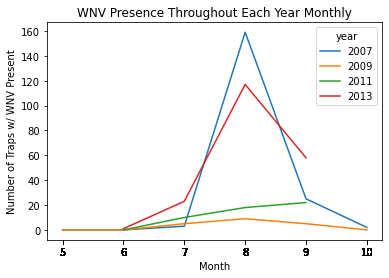

In [12]:
ax = train.groupby(by=['year','month'])['wnvpresent'].sum().unstack(level=0).plot(xticks=train['month'], 
                                                                                        title='WNV Presence Throughout Each Year Monthly')
ax.set_xlabel('Month')
ax.set_ylabel('Number of Traps w/ WNV Present');

plt.savefig('../images/WNV_presence_each_year_monthly.png')

From the chart above, we notice a trend that the peak of WNV peak is in August, and it starts in July and ends in September. Only 2007 and 2013 have shown such a trend. 

In [13]:
spray.head(1)

,date,latitude,longitude,year,month,day
0,2011-08-29,42.391623,-88.089163,2011,8,29


In [14]:
#checking the list of date that spraying occured

spray.groupby(['date']).count()

,latitude,longitude,year,month,day
date,,,,,
2011-08-29,95,95,95,95,95
2011-09-07,1573,1573,1573,1573,1573
2013-07-17,2202,2202,2202,2202,2202
2013-07-25,1607,1607,1607,1607,1607
2013-08-08,1195,1195,1195,1195,1195
2013-08-15,2668,2668,2668,2668,2668
2013-08-16,141,141,141,141,141
2013-08-22,1587,1587,1587,1587,1587
2013-08-29,2302,2302,2302,2302,2302


Since the trend of WNV presence is obvious in 2013 and most of the spray data available is in 2013, we will focus on looking at 2013 data. 

In 2013, there were total 8 sprayings.
- Jul: 2 sprayings
- Aug: 5 sprayings
- Sep: 1 spraying

In [15]:
# Remove spray location outside Chicago, since no train/test data in these areas
spray = spray[(spray['longitude']>=-88) & (spray['latitude']<=42.3)]
spray.head()

,date,latitude,longitude,year,month,day
95,2011-09-07,41.981433,-87.787777,2011,9,7
96,2011-09-07,41.980998,-87.787778,2011,9,7
97,2011-09-07,41.980560,-87.787762,2011,9,7
98,2011-09-07,41.980198,-87.787758,2011,9,7
99,2011-09-07,41.979752,-87.787765,2011,9,7


In [16]:
# We will look at data in 2013
train_2013 = train[train['year']==2013]
train_2013.head(5)

,date,species,trap,latitude,longitude,wnvpresent,nummosquitos,year,month,day,...,heatengineer,last_rainedengineer,proba_wnv,proba_num,species_weights,month_weight,dead1,dead2,dead3,dead4
6552,2013-06-07,CULEX PIPIENS/RESTUANS,T073,41.773215,-87.600880,0,2,2013,6,7,...,2.178338,1.000000,0.492341,0.490732,0.491536,0.002188,29.846006,29.096991,32.852241,11.344700
6553,2013-06-07,CULEX RESTUANS,T073,41.773215,-87.600880,0,1,2013,6,7,...,2.178338,1.414214,0.105033,0.173513,0.130855,0.002188,29.846006,29.096991,32.852241,11.344700
6554,2013-06-07,CULEX RESTUANS,T030,41.899230,-87.716788,0,10,2013,6,7,...,2.148841,1.732051,0.105033,0.173513,0.130855,0.002188,12.876690,12.110540,16.675305,23.660860
6555,2013-06-07,CULEX RESTUANS,T048,41.867108,-87.654224,0,2,2013,6,7,...,2.165892,2.000000,0.105033,0.173513,0.130855,0.002188,18.774527,18.101654,22.963275,19.945151
6556,2013-06-07,CULEX RESTUANS,T047,41.868142,-87.696269,0,2,2013,6,7,...,2.168541,2.236068,0.105033,0.173513,0.130855,0.002188,16.718860,15.938358,19.998871,20.038295


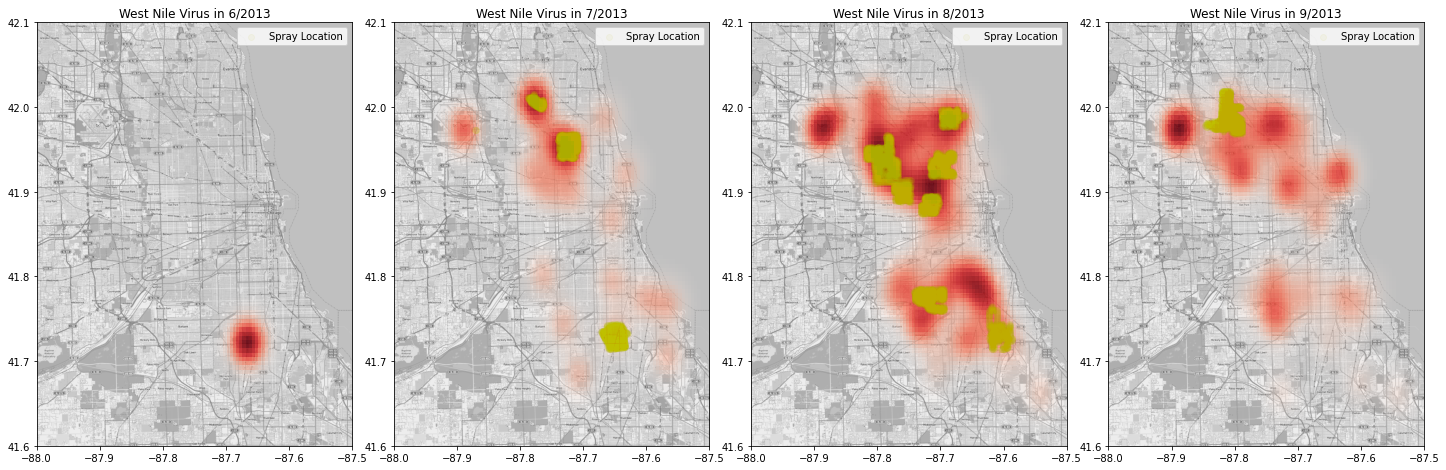

In [17]:
# Map trap and west nile heatmap 
fig, ax = plt.subplots(figsize = (20,9),nrows = 1, ncols = 4, sharey = False)
fig.tight_layout()

for idx, month in enumerate(train_2013['month'].unique()):
    
    # Show map in desired lat, long range 
    axis = ax[idx]
    axis.imshow(mapdata, cmap = plt.get_cmap('gray'), extent = (-88, -87.5, 41.6, 42.1),
               aspect = mapdata.shape[0] * 1.0 / mapdata.shape[1])
    
    # Scatter plot for trap locations 
    traps = train_2013[['longitude', 'latitude']].drop_duplicates().values
    
    # Plot a density map of West Nile Virus sighting
    alphas = plt.cm.Reds
    alphas._init()
    alphas._lut[:-3, -1] = abs(np.logspace(0,1,alphas.N) / 10 - 1)[::-1]
    virus_locs = train_2013[['longitude','latitude']][(train_2013['wnvpresent'] == 1) & (train_2013['month'] == month)]
    kern = KernelDensity(bandwidth = 0.02)
    kern.fit(virus_locs.values)
    xv, yv = np.meshgrid(np.linspace(-88, -87.5, 100), np.linspace(41.6, 42.1, 100))
    gridpoints = np.array([xv.ravel(), yv.ravel()]).T
    zv = np.exp(kern.score_samples(gridpoints).reshape(100,100))
    axis.imshow(zv,
               origin = 'lower',
              cmap = alphas,
              extent = (-88, -87.5, 41.6, 42.1),
              aspect = mapdata.shape[0]*1.0/mapdata.shape[1])
    
    # Scatter plot for spray locations (removing outliers far away from the rest of the traps)
    spray_loc = spray[['longitude', 'latitude','month']].drop_duplicates()
    current = spray_loc[spray_loc['month']==month]
    axis.scatter(current['longitude'], current['latitude'], marker = 'o', color = 'y', label = "Spray Location", alpha=0.05)
    
    # Labels
    axis.set_title(f"West Nile Virus in {month}/2013")
    axis.legend();
    plt.savefig('../images/effectiveness_of_spray.png')

In the above plots, the red area shows the density of WNV presence. And yellow dots represent the locations when sprayings occurred in 2013. 

We can see that the most sprayings occurred in August, while WNV presence is the most dense in August.

### Month

By plotting the heatmap on prevalence of WNV by month in 2013, we can see that prevalence of the WNV peaks between July and September. 

This suggests that we should start in early July before the expected spike begins in mid July.

In short, the spraying should occur from July to September these 3 months. This would reduce numbers of vector mosquitoes during late summer, the period of greatest risk for humans.

Next, we will look at the frequency of spraying.

### Frequency

![mosquito_life_cycle](../images/mosquito_life_cycle.png)

The Chicago Department of Public Health (CDPH) is continuing its efforts to protect residents against West Nile virus. Based on results from its citywide mosquito surveillance program, CDPH has determined the need to spray to kill adult mosquitoes. 

The material being used to control the adult mosquitoes, Zenivex™, is approved for use by the U.S. Environmental Protection Agency and has been widely applied to control mosquitoes in outdoor residential and recreational areas.

The most effective mosquito control programs use adulticides in conjunction with larvicides. This is especially necessary when there are an excessive number of adult mosquitoes in an area or the outbreak of disease poses a health threat to your community.

The entire life cycle of mosquito, from an egg to an adult, takes approximately 8-10 days.

Since the spray targets on adult mosquitoes to kill them, the frequency of spary should be once every week, considering the life cycle of mosquito. 

The spray should be taken place in July, August and September, once every week. Hence, there should be 12 sprayings to occur in Chicago in Summer, the warmest season of th year.


*Source:*

*https://www.chicago.gov/city/en/depts/cdph/provdrs/healthy_communities/news/2020/august/city-to-spray-insecticide-thursday-to-kill-mosquitoes.html*

*https://www.centralmosquitocontrol.com/all-products/zenivex*

### 2. Where to spray

By plotting the heatmap on predicted WNV presence locations, we are able to see 5 main spots that have the largest clusters. In order to estimate the cost of spraying, we will calculate the area that needs to be sprayed and the cost incurred.

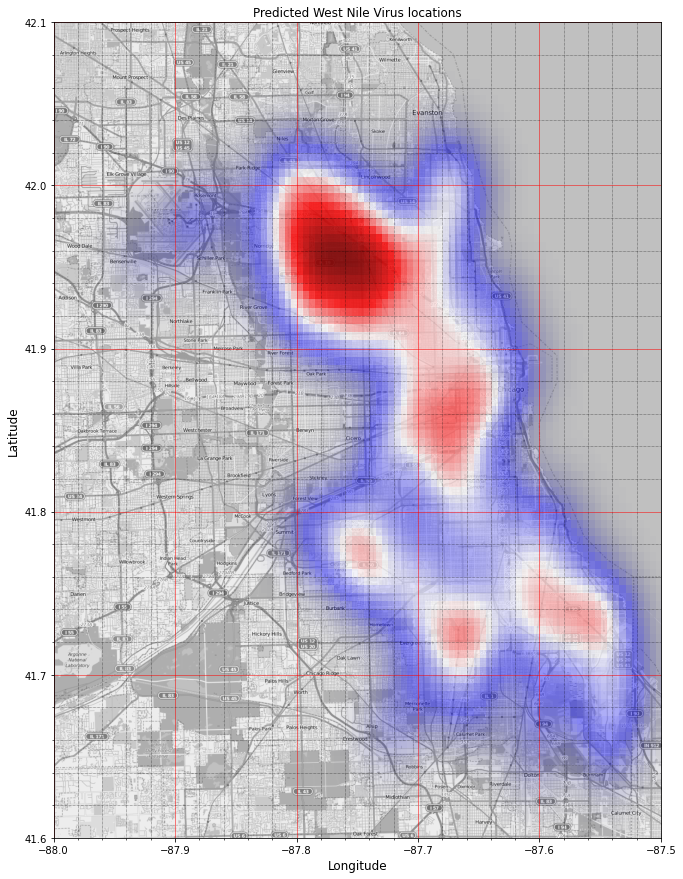

In [18]:
# plot possible outbreak areas
# Plot west nile predictions geographically 
# Initialize map 

plt.figure(figsize = (15,15))
ax = plt.gca()
ax.imshow(mapdata, cmap = plt.get_cmap('gray'), extent = (-88, -87.5, 41.6, 42.1),
           aspect = mapdata.shape[0] * 1.0 / mapdata.shape[1])

# Plot a density map of our West Nile Virus predictions
alphas = plt.cm.seismic
alphas._init()
alphas._lut[:-3, -1] = abs(np.logspace(0,1,alphas.N) / 10 - 1)[::-1]
virus_loc = sub[['Longitude','Latitude']]
kern = KernelDensity(bandwidth = 0.02)
kern.fit(virus_loc.values)
xv, yv = np.meshgrid(np.linspace(-88, -87.5, 100), np.linspace(41.6, 42.1, 100))
gridpoints = np.array([xv.ravel(), yv.ravel()]).T
zv = np.exp(kern.score_samples(gridpoints).reshape(100,100))
ax.imshow(zv,
          origin = 'lower',
          cmap = alphas,
          extent = (-88, -87.5, 41.6, 42.1),
          aspect = mapdata.shape[0]*1.0/mapdata.shape[1])

# Don't allow the axis to be on top of your data
ax.set_axisbelow(True)

# Turn on the minor TICKS, which are required for the minor GRID
ax.minorticks_on()

# Customize the major grid
ax.grid(which='major', linestyle='-', linewidth='0.5', color='red')
# Customize the minor grid
ax.grid(which='minor', linestyle=':', linewidth='0.5', color='black')

plt.title("Predicted West Nile Virus locations")
plt.xlabel("Longitude", fontsize=12)
plt.ylabel("Latitude", fontsize=12)
plt.savefig('../images/5_spots_grid.png')
plt.show()


In the above, we have drawn both major and minor grid lines on the map to divide Chicago city into 25 big blocks, 25*25= 625 small blocks. This method will give us a more precise estimate on the area that we should spray. 

The 5 hotspots scatter in 5 different big blocks. Depending on the budget, the Chicago government can choose to spray all 5 spots, or select the 2 most dense spots, or select only 1 most dense spot to spray. We will list out 3 possible options for the decision maker to choose. 

By latitude and longitude, we can calculate the height and width of each big block and multiple them to get the total area of one big block.


| |Latitude|Longitude|Distance between Origin and Destination points|
|:---|:---|:---|:---|
|Origin 1|41.8|-87.8| |
|Destination 1|41.8|-87.7|8.29 km (width of big block)|
|Origin 1|41.8|-87.8| |
|Destination 2|41.7|-87.8|11.12 km (height of big block)|


Total area of one big block is: 8.28 x 11.12 = 92.0736 km²

Total area of one small block is: 92.0736 / 25 = 3.68 km²

We will name the 5 spots based on their size from 1 to 5 as below.

![5_spots](../images/5_spots.png)


|Spot|Number of small blocks| x Total area of one small block| = Total area of spot|
|:---|:---|:---|:---|
|Spot 1|25|3.68|92.07 km²|
|Spot 2|10|3.68|36.8 km²|
|Spot 3|8|3.68|29.44 km²|
|Spot 4|5|3.68|18.4 km²|
|Spot 5|3|3.68|11.04 km²|
|All spots|51|3.68|187.68 km²|


## Calculating the Cost

In the above, we have answered 1. When to spray and 2. Where to spray.

Now we have to find out the cost of spray.

We obtained cost information for the 2005 emergency mosquito control aerial spray from the Sacramento-Yolo Mosquito and Vector Control District (SYMVCD). In 2005, an outbreak of West Nile virus (WNV) disease occurred in Sacramento County, California. The district conducted an emergency aerial spray.

#### Emergency Vector Control Spray

The emergency spray comprised 1,157 additional overtime hours in SYMVCD for August 2005. These overtime hours cost ≈ USD 41,790. The emergency spray cost ≈ USD 660,000 (D. Brown, pers. comm.). Therefore, the emergency aerial spray response to the WNV epidemic cost a total of USD 701,790.

The emergency aerial spray included aerial ultra-low–volume adulticiding over 2 areas in Sacramento County comprising ≈477 km². Aerial spraying was conducted on 6 nights in early and mid-August. 

Vector control cost ≈ USD 701,790, including spray procedures and overtime hours. 

In other words, 

- each spray costs: USD 701,790 / 6 sprayings = USD 116,965 /spraying
- each km² costs: USD 701,790 / 477 km² = USD 1,471.26 /km²

#### Cost per spray per km²: 

**USD 701,790 / 6 sprayings / 477 km² = USD 245.2 per spray per km²**


*Source: 
https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3322011/*


### Area to be sprayed x Cost per spray per km² x Times of spraying = Total spray cost

|Plan|Spray coverage|Area to be sprayed| x Cost per spray per km²| x Times of spraying| = Total spray cost|
|:---|:---|:---|:---|:---|:---|
|Plan 1|Spot 1|92.07 km²|USD 245.2|12|USD 270,906|
|Plan 2|Spot 1 + 2|128.8 km²|USD 245.2|12| USD 378,981|
|Plan 3|All 5 spots|187.68 km²|USD 245.2|12|USD 552,229|

We have listed out 3 plans for decision makers to choose depending on the resources available, for instance, budget and labour. If Chicago government is determined to strengthen the mosquito control and is willing to allocate more resources, plan 3 has the widest coverage for the presence of West Nile Virus in Chicago. 

In order to decide which plan to take, we will quantify the benefit of pesticide spraying to make a comparision between cost and benefit. 

## Calculating the Benefit

### Cost-Benefit Analysis in Chicago

With reference to the information in Sacramento County, California in 2005, there was an outbreak of West Nile virus (WNV) disease occurred; 163 human cases were reported.

WNV disease in Sacramento County cost ≈ USD 2.28 million for medical treatment and patients’ productivity loss for both West Nile fever and West Nile neuroinvasive disease. Vector control cost ≈USD 701,790, including spray procedures and overtime hours. 

Total cost of the 2005 Sacramento County WNV epidemic was USD 2,979,037. 

Costs for treating WNND patients alone exceeded costs of emergency vector control by $1,438,619, a ratio of 3:1. This difference suggests that for the benefits of the vector control to outweigh the cost of the epidemic, the spray event would need to prevent only 15 WNND cases.

Similary, the above cost-benefit analysis in Sacramento County can be applied in Chicago. 
 
In Sacramento County, 163 WNV cases incurred loss of USD 2.28 million for medical treatment and patients’ productivity loss, which means 1 single case incurs loss of USD 18,276.

If Chicago government will choose Plan 3 to cover all 5 spots to spray, the total pesticide spraying cost is USD 552,229. To outweight this cost, the spray event would only need to prevent only 30 WNV disease cases in whole Chicago.

The total cost of medical treatment and patients’ productivity loss can be avoided by conducting pesticide spraying (Avoided loss). After deducting the spraying cost, if it's positive, that is the potential benefit.

### Annual cost projections for various levels of pesticide coverage (cost) and the effect of these various levels of pesticide coverage (benefit) is shown below: 

|Chicago|WNV case number|Suggested plan|Avoided loss| - Spray cost| = Potential benefit|
|:---|:---|:---|:---|:---|:---|
|2010|47|Plan 3 All 5 spots|USD 858,972|USD 552,229|USD 306,743|
|2011|24|Plan 2 Spot 1 + 2 / further analysis|USD 438,624|USD 378,981|USD 59,643|
|2012|229|Plan 3 All 5 spots|USD 4,185,204|USD 552,229|USD 3,632,975|
|2013|66|Plan 3 All 5 spots|USD 1,206,216|USD 552,229|USD 653,987|
|2014|31|Plan 3 All 5 spots|USD 566,556|USD 552,229|USD 14,327|
|2015|36|Plan 3 All 5 spots|USD 657,936|USD 552,229|USD 105,707|
|2016|108|Plan 3 All 5 spots|USD 1,943,808|USD 552,229|USD 1,421,579|


Between 2010 to 2016, 6 years out of 7 have more than 30 cases. Hence, it is evident that the pesticide spraying is necessary to avoid the huge economic loss caused by WNV virus.

As long as the total WNV case number of the year is over 30, only conducting pesticide spraying with full coverage of all 5 spots with WNV presence will attain the maximum benefit.

If the total WNV case number of the year is below 30, Plan 1 or Plan 2 can be considered. But if we want to have a more precise target on the spray location, we can also carry out further analysis to find out which spots have the most dense distribution of WNV presence of the year. Even the coverge is less, but as long as we spot it accurately, we will still be able to conduct an effective mosquito control program.

The Cost-benefit analyis helps the Chicago Department of Public Health (CDPH) to decide when to spray, where to spray, how much it costs to carry out the spray and the potential benefit the spraying can bring. Apart from the Cost-benefit analysis, the model we developed and the analysis we conducted before have more than just single use. In the following, we will discuss about some recommendations. 

*Source:*

*https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0227160*

*https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3322011/*

## Conclusion and Recommendations

## Recommendations:

Based on our analysis, we have decided on the following recommendations for the Chicago Department of Public Health (CDPH):

1. <b>Execute fogging/pesticide spraying on current West Nile Virus hot spots</b><br>
Referring to our model and our cost-benefit analysis, we advise the CDPH to execute fogging as soon as possible on current West Nile Virus hot spots since the hot spots have stayed consistent over the years. With the distance of a location to a hot spot being noted as an important feature as shown by our 'Top 25 Important Features' model, fogging on current hotspots can also help to curb the spread of the WNV to neighbouring areas. Based on the current yearly budget allocated for the control of the West Nile Virus, CDPH can choose from one of the three tiers as listed in our cost-benefit analysis for appropriate pesticide coverage plans that fits their budget.<br>


2. <b>Consider fogging on areas that experience high temperatures during the summer</b><br>
Besides tackling the current problem on-hand by spraying on all current West Nile Virus hotspots, the CDPH should also consider fogging on other areas that are known to experience high temperatures (especially during the summer months) since high temperatures are known to cause a spike in West Nile Virus cases in a certain area. By doing this, CDPH can help to prevent the spread of the WNV in other areas that are currently not viewed as WNV hotspots, especially areas with high temperatures that can be viewed as future potential WNV hotspots.<br>


3. <b>Study and execute more research on mosquito species with higher probability of West Nile Virus</b><br>
Two mosquito species (Culex Pipiens and Culex Pipiens/Restuans) are calculated to have higher probability of contracting the West Nile Virus as opposed to the other mosquito species. Since the mosquito species is an important feature as prioritised by our prediction model, more research should be made on the reasons why these two species are more prone to the West Nile Virus. This will help the CDPH in their WNV control planning efforts since a deeper understanding of their breeding and living behaviours will be known. Focusing on these two species will definitely help curb the spread of the WNV by a fairly significant amount, since direct actions can be done to stop the spread of these two highly infectious species.<br>


4. <b>Develop an app that highlights the current WNV hotspots</b><br>
Since WNV hotspots generally stay consistent for long periods of time, an app that maps current WNV hotspots can be developed so that citizens of Chicago would be able to refer to it anytime they would like. Locations of the WNV hotspots should at least be updated on a monthly basis (since summer months are known to have surge of West Nile Virus cases and the map can reflect that).


5. <b>Increase public awareness of West Nile Virus when the risk of contracting the virus is high</b><br>
Since various weather-related and time-related conditions (e.g. month, temperature) are predicted to affect the presence of West Nile Virus at various locations, CDPH should make use of all new information gained from the our analysis to plan their public awareness efforts accordingly. For example, knowing that West Nile Virus is more prevalent in summer months, CDPH can ramp up their public awareness campaigns efforts during these months.


6. <b>Study and identify unknown mosquito species</b><br>
According to the provided metadata, a record exists only when a particular species of mosquito is found at a certain trap; otherwise it will be identified as a 'unknown species'. There are numerous species that are identified as 'unknown species' on the test dataset and hence, this method of data collection can highly induces bias in the predictive model since the available data does not represent the true demographics of the mosquito population in Chicago. The unknown mosquito speicies should be studied and identified so as to reduce the bias of the predictive model and eventually help to improve the performance of the prediction model.<br>




## Conclusion:
After comparing the performance of all models, we have decided to choose a Random Forest Classifier model for our West Nile Virus predictions due to its high ROC_AUC score (together with its high recall rate). 

Through exploratory data analysis and the study of our most important features as generated by our chosen model, we have found out that most features that highly affect the presence of West Nile Virus at a location are:

- weather-related (e.g. temperature)
- location-related (e.g. near WNV hot spots) 
- season-related (i.e. months)

This is followed by an in-depth cost-benefit analysis to quantify cost projections and analyse the effects of pesticide coverage. With the usage of this prediction model, the knowledge of important features that can affect the existence of West Nile Virus as well as the cost-benefit analysis of pesticide coverage, Chicago Department of Public Health can make use of these insights to incorporate appropriate measures in their West Nile Virus surveillance and control efforts in the city of Chicago.

Moving forward, the model should be continuously fed with more data so that that the model can continuously calibrate and improve overtime. Additional data related to various building information (e.g. drainage systems, pot holes, pools) should also be used and added to the model since it can provide us with insights on the breeding origin of the mosquitos and may even improve the performance of the model.

In the future, the model can potentially be utilised elsewhere to solve other social or business-related problems, such as by local shop owners to make informed restocking decisions on mosquito-repellent products, and public health researchers for West Nile Virus research-related purposes.